## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [4]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas_datareader'

In [21]:
!pip install pandas_datareader
start = "2017-01-01"
end = "2018-12-31"
symbols = ["AAPL"]

data = pdr.get_data_yahoo(symbols, start, end)

data.head()

TypeError: string indices must be integers

In [23]:
!pip install yfinance
import yfinance as yf
yf.pdr_override()
start = "2017-01-01"
end = "2018-12-31"
symbols = ["AAPL"]


data = pdr.get_data_yahoo(symbols, start, end)

data.head()

  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pytz-2021.3-py3.10.egg-info\\dependency_links.txt'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'yfinance'

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

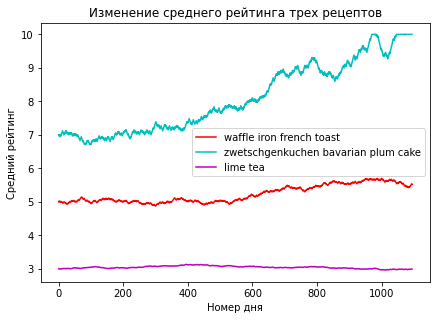

In [6]:
ar = np.load('average_ratings.npy')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
line_1, = ax.plot(ar[0], 'r', label = 'waffle iron french toast')
line_2, = ax.plot(ar[1], 'c', label = 'zwetschgenkuchen bavarian plum cake')
line_3, = ax.plot(ar[2], 'm', label = 'lime tea')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.legend(handles=[line_1, line_2, line_3])

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


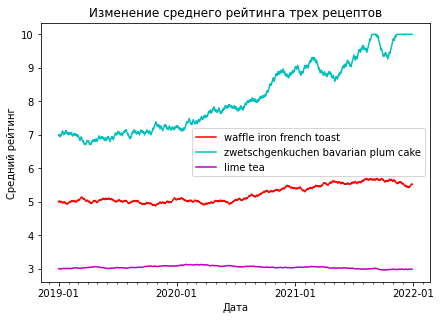

In [7]:
time = pd.date_range(start='1/1/2019', end='30/12/2021')
ar = np.load('average_ratings.npy')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
line_1, = ax.plot(time, ar[0], 'r', label = 'waffle iron french toast')
line_2, = ax.plot(time, ar[1], 'c', label = 'zwetschgenkuchen bavarian plum cake')
line_3, = ax.plot(time, ar[2], 'm', label = 'lime tea')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend(handles=[line_1, line_2, line_3])


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


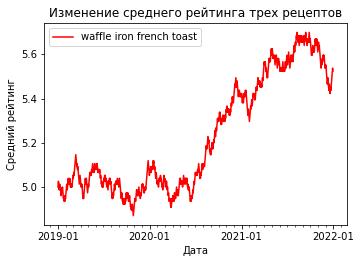

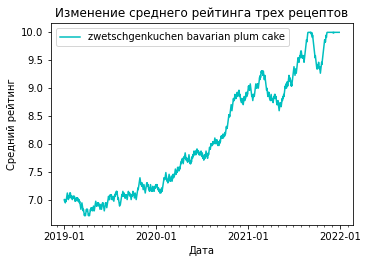

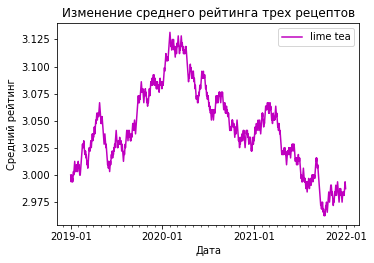

In [13]:
time = pd.date_range(start='1/1/2019', end='30/12/2021')
ar = np.load('average_ratings.npy')
fig1 = plt.figure()
ax_1 = fig1.add_axes([0.1, 0.1, 0.7, 0.7])
fig2 = plt.figure()
ax_2 = fig2.add_axes([0.1, 0.1, 0.7, 0.7])
fig3 = plt.figure()
ax_3 = fig3.add_axes([0.1, 0.1, 0.7, 0.7])
line_1, = ax_1.plot(time, ar[0], 'r', label = 'waffle iron french toast')
line_2, = ax_2.plot(time, ar[1], 'c', label = 'zwetschgenkuchen bavarian plum cake')
line_3, = ax_3.plot(time, ar[2], 'm', label = 'lime tea')
axs = [ax_1, ax_2, ax_3]
axs[0].legend(handles = [line_1])
axs[1].legend(handles = [line_2])
axs[2].legend(handles = [line_3])
for axx in axs:
    axx.set_xlabel('Дата')
    axx.set_ylabel('Средний рейтинг')
    axx.set_title('Изменение среднего рейтинга трех рецептов')
    axx.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
    axx.xaxis.set_minor_locator(mdates.MonthLocator())

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


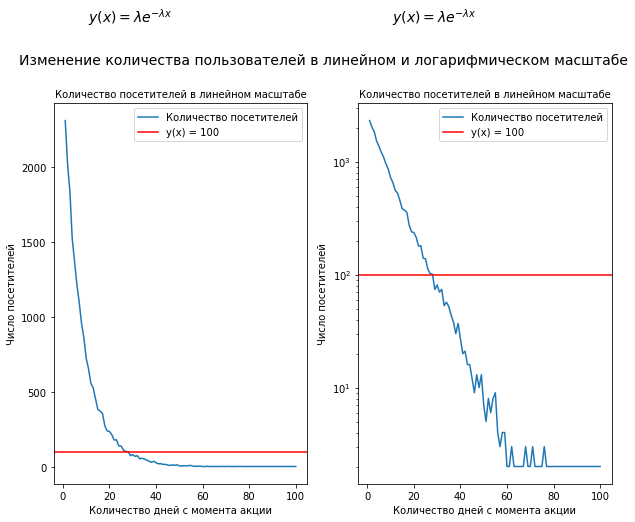

In [24]:
ar_1 = np.load('visitors.npy')
fig2, axs = plt.subplots(ncols=2, figsize=(10,7))
fig2.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize=15)
for ax in axs:
    ax.set_title("Количество посетителей в линейном масштабе", fontsize = 10)
    ax.set_xlabel("Количество дней с момента акции")
    ax.set_ylabel("Число посетителей")
    ax.plot(range(1, 101), ar_1, label="Количество посетителей")
    ax.axhline(y=100, color='r', label="y(x) = 100")
    ax.legend()
    ax.text(0.3, 1.2, r"$y(x) = \lambda e^{-\lambda x}$", transform=ax.transAxes, ha='center', va='bottom', fontsize=14)
axs[1].set_yscale('log')
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [25]:
recipes = pd.read_csv("recipes_sample.csv")
reviews = pd.read_csv("reviews_sample.csv")

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

{'short': 4.990430622009569, 'medium': 9.805582137161085, 'long': 11.917290164603456}


<AxesSubplot:title={'center':'Размеры групп рецептов'}, ylabel='a'>

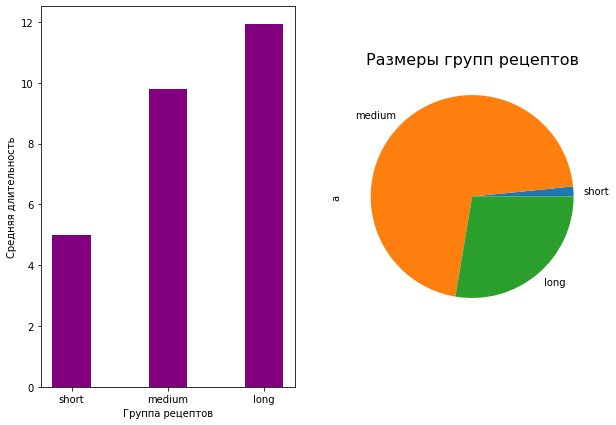

In [60]:
rec_short = recipes[recipes['minutes']<5]
rec_med = recipes[(recipes['minutes']>=5)+(recipes['minutes']<50)]
rec_long = recipes[recipes['minutes']>=50]
ar_data = pd.DataFrame({'a':np.array([rec_short.shape[0], rec_med.shape[0], rec_long.shape[0]])}, index=['short','medium','long'])
graph_1 = {'short':np.mean(rec_short['n_steps']), 'medium':np.mean(rec_med['n_steps']), 'long':np.mean(rec_long['n_steps'])}
print(graph_1)
fig, axs = plt.subplots(ncols=2, figsize=(10,7))
keys_1 = list(graph_1.keys())
values_1 = list(graph_1.values())
axs[0].bar(keys_1, values_1, color = 'purple', width = 0.4)
axs[0].set_xlabel('Группа рецептов', fontsize=10)
axs[0].set_ylabel('Средняя длительность', fontsize=10)
axs[1].set_title('Размеры групп рецептов', fontsize=16)
ar_data.a.plot(kind='pie')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

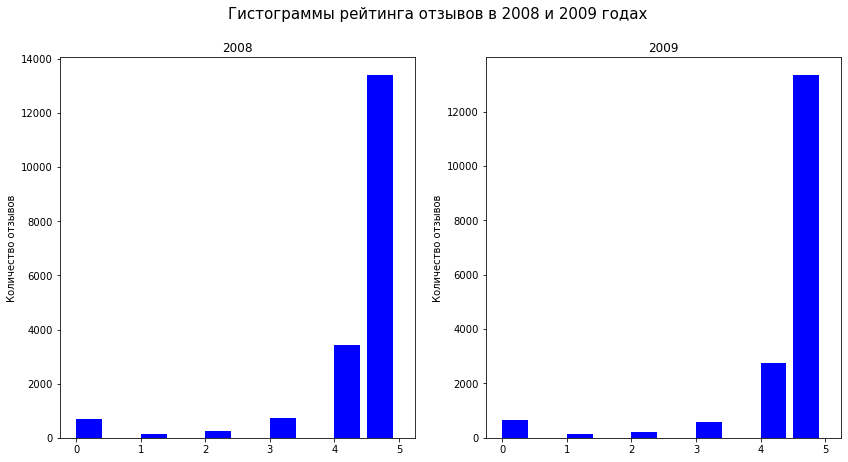

In [49]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews_2008 = reviews[reviews['date'].dt.year == 2008]
reviews_2009 = reviews[reviews['date'].dt.year == 2009]
fig, axs = plt.subplots(ncols=2, figsize=(14, 7))
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=15)
axs[0].hist(reviews_2008['rating'], color = 'blue', width = 0.4, align='mid')
axs[1].hist(reviews_2009['rating'], color = 'blue', width = 0.4, align='mid')
axs[0].set_title('2008')
axs[1].set_title('2009')
axs[0].set_ylabel('Количество отзывов')
axs[1].set_ylabel('Количество отзывов') 
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

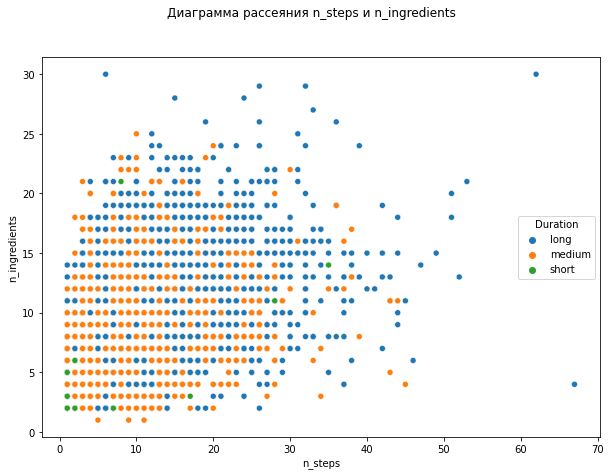

In [57]:
import seaborn as sns
rec = recipes[['n_steps','n_ingredients']]
recipes.loc[recipes['minutes'] < 5, 'Duration'] = 'short'
recipes.loc[(recipes['minutes'] >= 5)&(recipes['minutes']<50), 'Duration'] = 'medium'
recipes.loc[recipes['minutes'] >= 50, 'Duration'] = 'long'
fig, ax = plt.subplots(figsize=(10, 7))
fig.suptitle('Диаграмма рассеяния n_steps и n_ingredients')
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue = recipes.Duration)
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

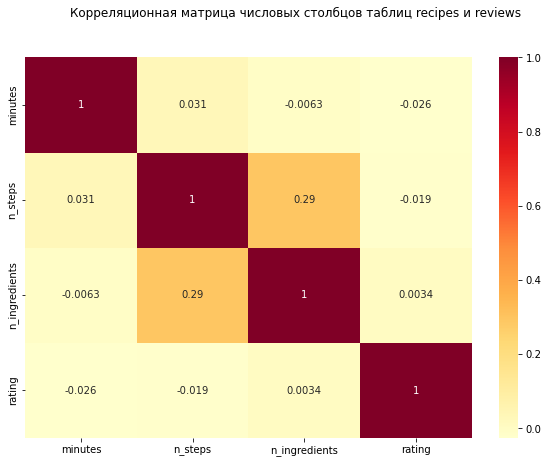

In [58]:
recipes['recipe_id'] = recipes['id']
merge_1 = pd.merge(recipes, reviews, on='recipe_id')
columns = ['minutes', 'n_steps', 'n_ingredients', 'rating']
matrix = merge_1[columns].corr()
fig, ax = plt.subplots(figsize=(10, 7))
fig.suptitle('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
sns.heatmap(matrix, annot=True, cmap='YlOrRd')
plt.show()